In [1]:
# Create a practice set of random latitude and longitude combinations.
# x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
# y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
# coordinates = zip(x, y)

In [2]:
# # Use the tuple() function to display the latitude and longitude combinations.
# for coordinate in coordinates:
#     print(coordinate[0], coordinate[1])

In [3]:
# pip install citipy

In [4]:
# Use the citipy module to determine city based on latitude and longituimport citipy
from citipy import citipy

# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from datetime import datetime

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
# for coordinate in coordinates:
#     print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
#           citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=50)
lngs = np.random.uniform(low=-180.000, high=180.000, size=50)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

44

In [9]:
# Import the requests library.
import requests

In [10]:
requests.__version__

'2.24.0'

In [11]:
# Import the API key.
from config import weather_api_key

In [12]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ee23d400752435fdd0ad6fd586b19ba1


In [13]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ee23d400752435fdd0ad6fd586b19ba1&q=Boston


In [14]:
weather_response = requests.get(city_url)
weather_json = weather_response.json()

In [15]:
weather_json

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 601,
   'main': 'Snow',
   'description': 'snow',
   'icon': '13d'}],
 'base': 'stations',
 'main': {'temp': 25.38,
  'feels_like': 16.12,
  'temp_min': 21.65,
  'temp_max': 28.89,
  'pressure': 1033,
  'humidity': 56},
 'visibility': 10000,
 'wind': {'speed': 8.99, 'deg': 355, 'gust': 14},
 'snow': {'1h': 0.51},
 'clouds': {'all': 20},
 'dt': 1641662237,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1641643980,
  'sunset': 1641677309},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [16]:
weather_json['wind']['deg']

355

In [17]:
weather_json.get('main')

{'temp': 25.38,
 'feels_like': 16.12,
 'temp_min': 21.65,
 'temp_max': 28.89,
 'pressure': 1033,
 'humidity': 56}

In [18]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [19]:
# Get the JSON data.
boston_data = city_weather.json()

In [20]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 28.89 56 20 8.99


In [21]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2022, 1, 8, 17, 17, 17)

In [22]:
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-01-08 17:17:17'

In [23]:
# Get the City Weather Data

In [24]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [25]:
len(cities)

44

In [26]:
cities[37]

'yerbogachen'

In [27]:
# # Loop through all the cities in our list.
# for i in range(len(cities)):

#     # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#         time.sleep(60)

#     # Create endpoint URL with each city.
#     city_url = url + "&q=" + cities[i]

In [28]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | kampene
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | safford
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | hasaki
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | saskylakh
Processing Record 10 of Set 1 | katsuura
Processing Record 11 of Set 1 | bluff
Processing Record 12 of Set 1 | beloha
Processing Record 13 of Set 1 | aflu
City not found. Skipping...
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 18 of Set 1 | torbay
Processing Record 19 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 20 of Set 1 | yamada
Processing Record 21 of Set 1 | port alfred
Processing Record 22 of Set 1 | saint-augustin
Processing Record 23

In [29]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kampene,-3.6000,26.6667,73.83,88,100,1.77,CD,2022-01-08 17:19:09
1,Kapaa,22.0752,-159.3190,69.78,82,100,9.22,US,2022-01-08 17:17:40
2,Jamestown,42.0970,-79.2353,25.09,47,0,7.00,US,2022-01-08 17:14:24
3,Safford,32.8340,-109.7076,62.11,61,0,3.44,US,2022-01-08 17:18:56
4,Punta Arenas,-53.1500,-70.9167,57.31,44,0,37.98,CL,2022-01-08 17:19:11
5,Hasaki,35.7333,140.8333,28.80,56,11,19.26,JP,2022-01-08 17:19:11
6,Busselton,-33.6500,115.3333,61.05,67,32,16.62,AU,2022-01-08 17:17:48
7,Mataura,-46.1927,168.8643,62.47,63,94,5.91,NZ,2022-01-08 17:19:12
8,Saskylakh,71.9167,114.0833,-28.21,96,6,9.48,RU,2022-01-08 17:19:13
9,Katsuura,35.1333,140.3000,50.18,59,28,19.39,JP,2022-01-08 17:19:13


In [30]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [31]:
# 6.3.1 Plot Latitude vs Temperature

In [32]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [33]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1641662374.6765387

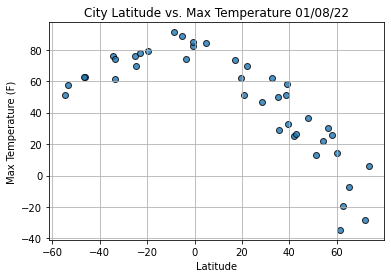

In [34]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

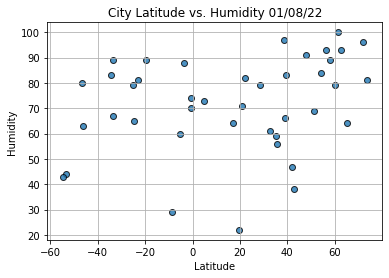

In [35]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

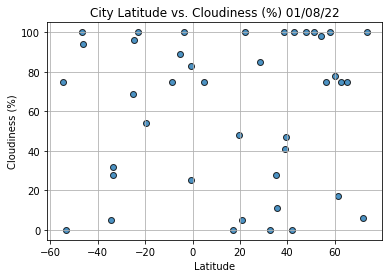

In [36]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

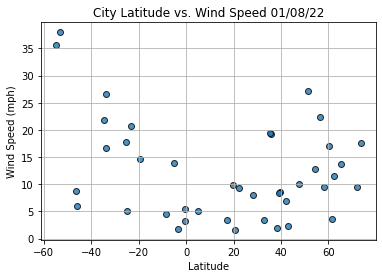

In [37]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [38]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [39]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [40]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [41]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

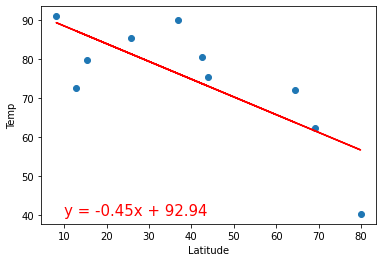

In [42]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

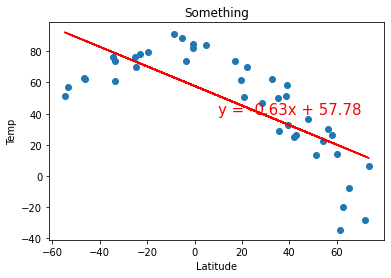

In [43]:
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
title = 'Something'
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = x_values * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(x_values,y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(x_values,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.title(title)
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [44]:
# # Create a function to create perform linear regression on the weather data
# # and plot a regression line and the equation with the data.
# def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

In [45]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [46]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Kapaa,22.0752,-159.3190,69.78,82,100,9.22,US,2022-01-08 17:17:40
2,Jamestown,42.0970,-79.2353,25.09,47,0,7.00,US,2022-01-08 17:14:24
3,Safford,32.8340,-109.7076,62.11,61,0,3.44,US,2022-01-08 17:18:56
5,Hasaki,35.7333,140.8333,28.80,56,11,19.26,JP,2022-01-08 17:19:11
8,Saskylakh,71.9167,114.0833,-28.21,96,6,9.48,RU,2022-01-08 17:19:13
9,Katsuura,35.1333,140.3000,50.18,59,28,19.39,JP,2022-01-08 17:19:13
13,Hami,42.8000,93.4500,26.26,38,100,2.24,CN,2022-01-08 17:19:17
15,Torbay,47.6666,-52.7314,36.57,91,100,10.00,CA,2022-01-08 17:17:46
16,Yamada,39.4667,141.9500,32.79,83,47,8.61,JP,2022-01-08 17:19:19
18,Saint-Augustin,51.2260,-58.6502,13.35,69,100,27.09,CA,2022-01-08 17:19:20


In [47]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Kapaa,22.0752,-159.3190,69.78,82,100,9.22,US,2022-01-08 17:17:40
2,Jamestown,42.0970,-79.2353,25.09,47,0,7.00,US,2022-01-08 17:14:24
3,Safford,32.8340,-109.7076,62.11,61,0,3.44,US,2022-01-08 17:18:56
5,Hasaki,35.7333,140.8333,28.80,56,11,19.26,JP,2022-01-08 17:19:11
8,Saskylakh,71.9167,114.0833,-28.21,96,6,9.48,RU,2022-01-08 17:19:13


In [48]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

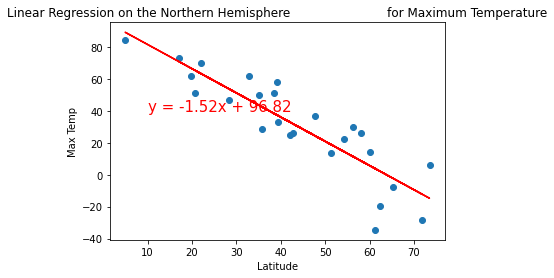

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

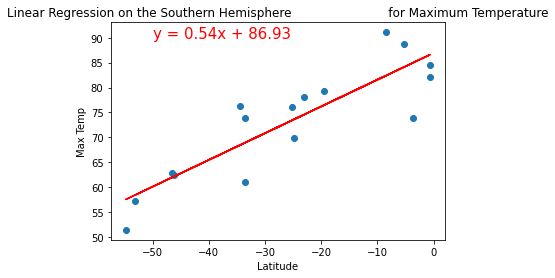

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

In [51]:
# 6.4.3 Find the Correlation Between Latitude and Percent Humidity

In [52]:
northern_hemi_df.head(1)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Kapaa,22.0752,-159.319,69.78,82,100,9.22,US,2022-01-08 17:17:40


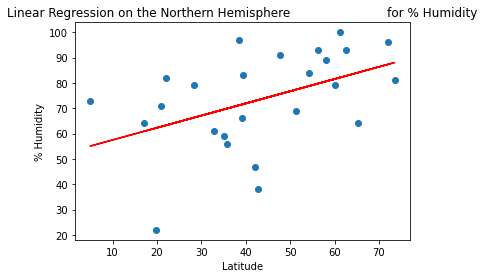

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

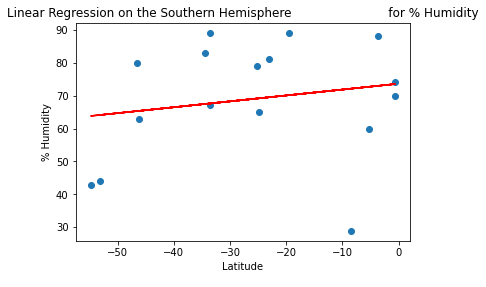

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

In [55]:
# 6.4.4 Find the Correlation Between Latitudes and Percent CLoudiness

In [56]:
northern_hemi_df.head(1)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Kapaa,22.0752,-159.319,69.78,82,100,9.22,US,2022-01-08 17:17:40


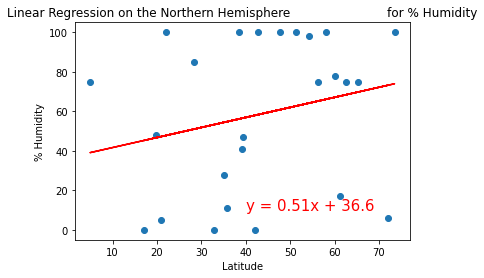

In [57]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
# Call the fucntion
plot_linear_regression(x_values
                       , y_values
                       , 'Linear Regression on the Northern Hemisphere \
                        for % Humidity'
                       , '% Humidity'
                       ,(40,10))

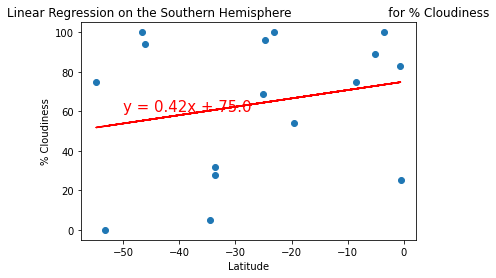

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

In [59]:
# 6.4.5 Find the Correlation Betwen Latitude and Wind Speed 

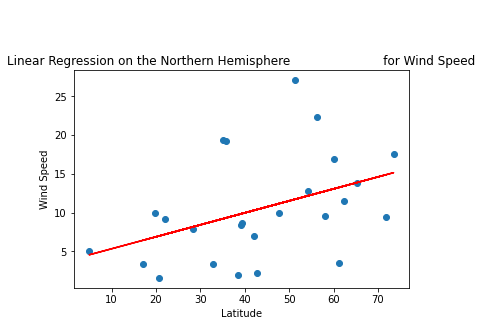

In [60]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for Wind Speed', 'Wind Speed',(40,35))

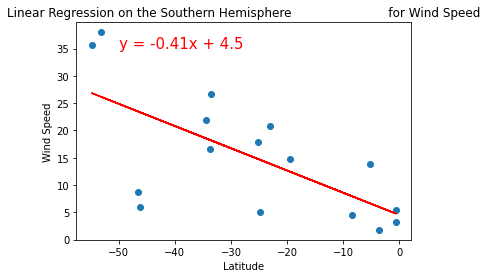

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))